
# Sentiment Analysis on the Amazon's Alexa device

In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import seaborn as sns
#os.chdir('E:\\Clair\\SEM3\\Marketing\\pROJECT\\archive')

In [2]:
# Read data
data = pd.read_csv('amazon_alexa.tsv',delimiter='\t')

### Data description

In [3]:
data.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
data['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

### Data Cleaning

In [6]:
# Checking null values
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [7]:
# Checking the empty spaces in the text column
empty_review = []
for index, text in enumerate(data.verified_reviews.values):
    if str(text).strip() == '':
        empty_review.append(index)
print(f"Number of rows with balnk review : {len(empty_review)}")
data.iloc[empty_review]

Number of rows with balnk review : 79


rating       date             variation verified_reviews  feedback
85         5  30-Jul-18  Heather Gray Fabric                           1
183        3  29-Jul-18  Heather Gray Fabric                           1
219        5  29-Jul-18     Sandstone Fabric                           1
374        1  26-Jul-18                 Black                          0
406        1  16-Jul-18                 White                          0
...      ...        ...                   ...              ...       ...
3114       3  30-Jul-18            Black  Dot                          1
3120       5  30-Jul-18            Black  Dot                          1
3123       4  30-Jul-18            Black  Dot                          1
3126       5  30-Jul-18            Black  Dot                          1
3141       3  30-Jul-18            Black  Dot                          1

[79 rows x 5 columns]

In [8]:
# Replacing with nan values
data['verified_reviews'] = data["verified_reviews"].replace(" ",np.nan)

In [9]:
# dropping the null values
data = data[data["verified_reviews"].notnull()]
data = data.reset_index()[data.columns]

In [10]:
# Checking again for empty rows
empty_review = []
for index, text in enumerate(data.verified_reviews.values):
    if str(text).strip() == '':
        empty_review.append(index)
print(f"Number of rows with balnk review : {len(empty_review)}")
data.iloc[empty_review]

Number of rows with balnk review : 0


Empty DataFrame
Columns: [rating, date, variation, verified_reviews, feedback]
Index: []

In [11]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

### EDA

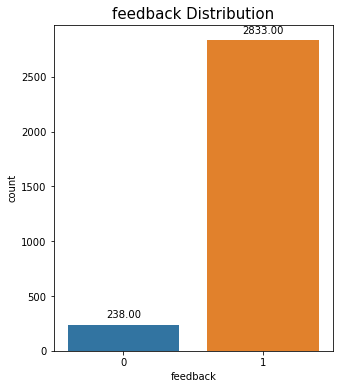

In [12]:
plt.figure(figsize=(5,6))
ax = sns.countplot(x="feedback", data=data)
ax.set_title('feedback Distribution', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [13]:
variation=data.groupby(['variation', 'feedback'])['verified_reviews'].count()
variation

variation                     feedback
Black                         0            34
                              1           224
Black  Dot                    0            34
                              1           460
Black  Plus                   0            27
                              1           234
Black  Show                   0            17
                              1           242
Black  Spot                   0            30
                              1           205
Charcoal Fabric               0            12
                              1           418
Configuration: Fire TV Stick  0            25
                              1           315
Heather Gray Fabric           0             2
                              1           151
Oak Finish                    1            14
Sandstone Fabric              0             6
                              1            82
Walnut Finish                 1             9
White                         0          

In [14]:
variation = variation.unstack().fillna(0)
variation

feedback                         0      1
variation                                
Black                         34.0  224.0
Black  Dot                    34.0  460.0
Black  Plus                   27.0  234.0
Black  Show                   17.0  242.0
Black  Spot                   30.0  205.0
Charcoal Fabric               12.0  418.0
Configuration: Fire TV Stick  25.0  315.0
Heather Gray Fabric            2.0  151.0
Oak Finish                     0.0   14.0
Sandstone Fabric               6.0   82.0
Walnut Finish                  0.0    9.0
White                         15.0   73.0
White  Dot                    10.0  170.0
White  Plus                    7.0   69.0
White  Show                   10.0   72.0
White  Spot                    9.0   95.0

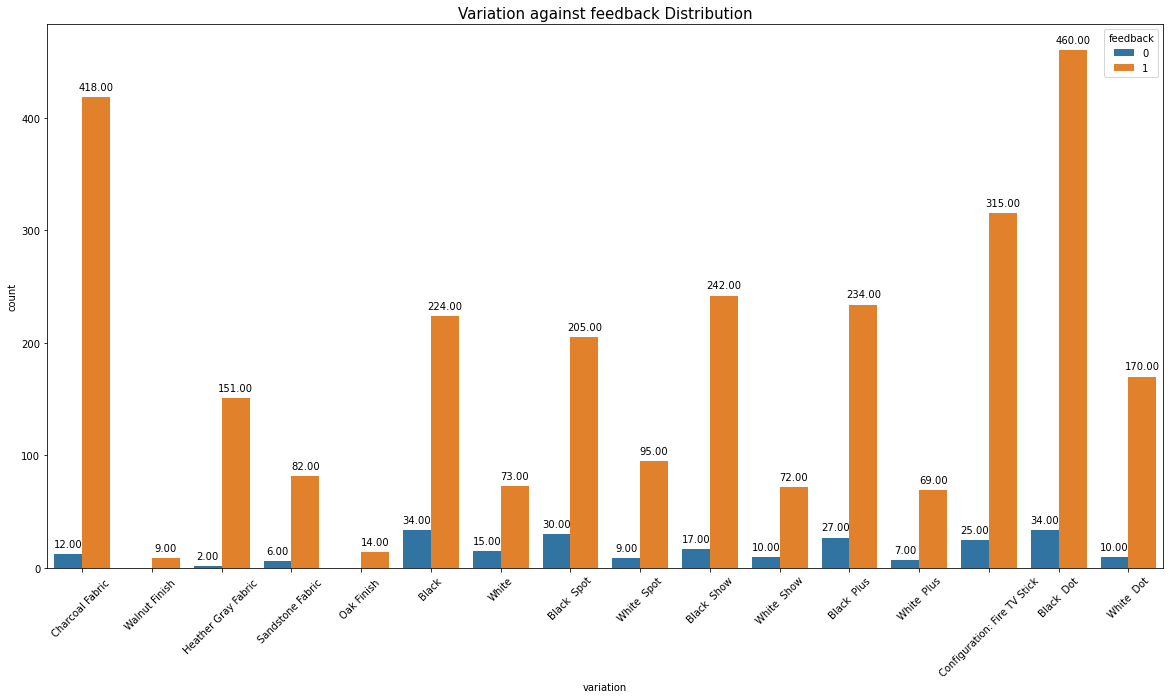

In [15]:


plt.figure(figsize=(20,10))
ax = sns.countplot(x="variation", hue = 'feedback',data=data)
ax.set_title('Variation against feedback Distribution', fontsize=15)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [16]:
variation['Tot_count']=variation[0]+variation[1]
variation

feedback                         0      1  Tot_count
variation                                           
Black                         34.0  224.0      258.0
Black  Dot                    34.0  460.0      494.0
Black  Plus                   27.0  234.0      261.0
Black  Show                   17.0  242.0      259.0
Black  Spot                   30.0  205.0      235.0
Charcoal Fabric               12.0  418.0      430.0
Configuration: Fire TV Stick  25.0  315.0      340.0
Heather Gray Fabric            2.0  151.0      153.0
Oak Finish                     0.0   14.0       14.0
Sandstone Fabric               6.0   82.0       88.0
Walnut Finish                  0.0    9.0        9.0
White                         15.0   73.0       88.0
White  Dot                    10.0  170.0      180.0
White  Plus                    7.0   69.0       76.0
White  Show                   10.0   72.0       82.0
White  Spot                    9.0   95.0      104.0

C:\Users\saisa\Anaconda3\envs\DAB-300\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


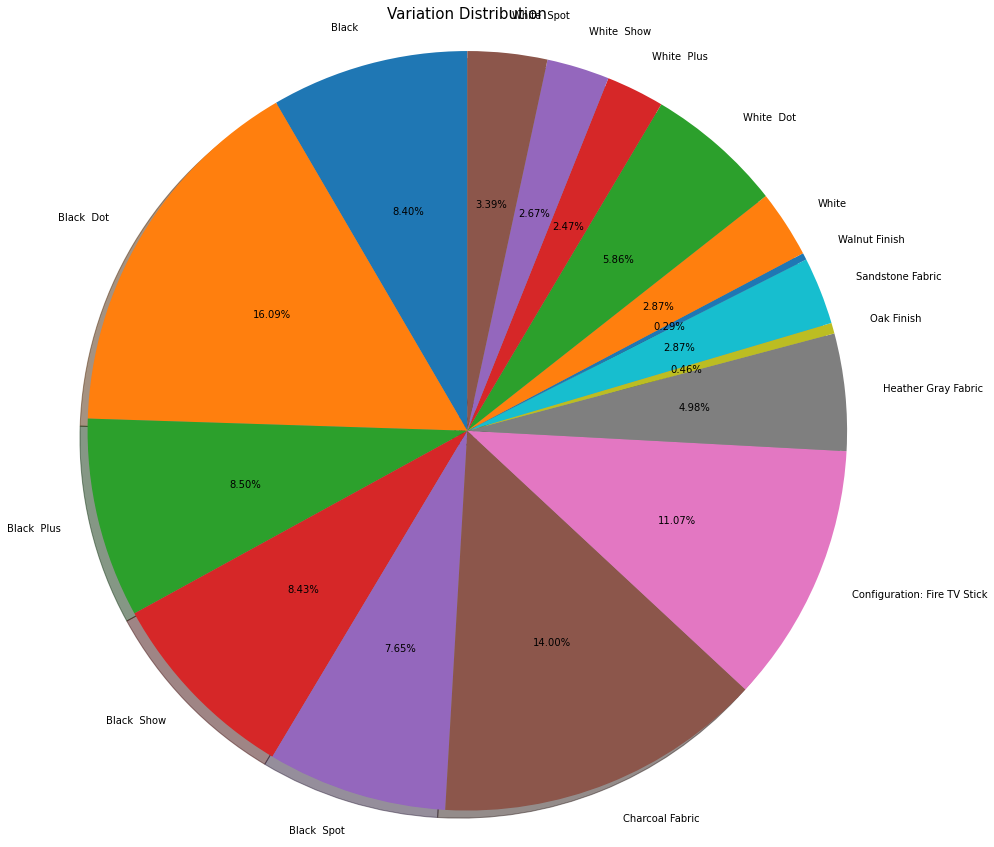

In [17]:
labels = variation.index
values = variation['Tot_count']
fig2, ax = plt.subplots(figsize =(15, 15))
ax.pie(values, labels=labels, shadow=True, autopct='%.2f%%', startangle=90)
ax.set_title('Variation Distribution', fontsize=15)
ax.axis('equal')
fig2.show()

In [18]:
data.rating.value_counts()

5    2246
4     447
1     146
3     140
2      92
Name: rating, dtype: int64

In [19]:
rating=data.groupby(['rating', 'feedback'])['verified_reviews'].count()
rating

rating  feedback
1       0            146
2       0             92
3       1            140
4       1            447
5       1           2246
Name: verified_reviews, dtype: int64

In [20]:
rating = rating.unstack().fillna(0)
rating

feedback      0       1
rating                 
1         146.0     0.0
2          92.0     0.0
3           0.0   140.0
4           0.0   447.0
5           0.0  2246.0

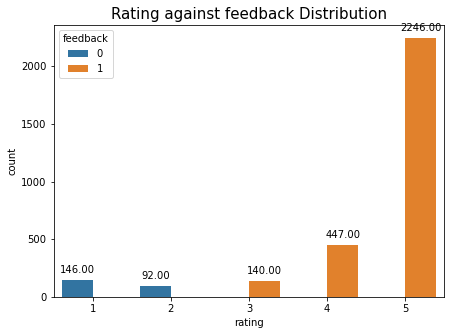

In [21]:


plt.figure(figsize=(7,5))
ax = sns.countplot(x="rating", hue = 'feedback',data=data)
ax.set_title('Rating against feedback Distribution', fontsize=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [22]:
rating['Total_count']=rating[0]+rating[1]
rating

feedback      0       1  Total_count
rating                              
1         146.0     0.0        146.0
2          92.0     0.0         92.0
3           0.0   140.0        140.0
4           0.0   447.0        447.0
5           0.0  2246.0       2246.0

C:\Users\saisa\Anaconda3\envs\DAB-300\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


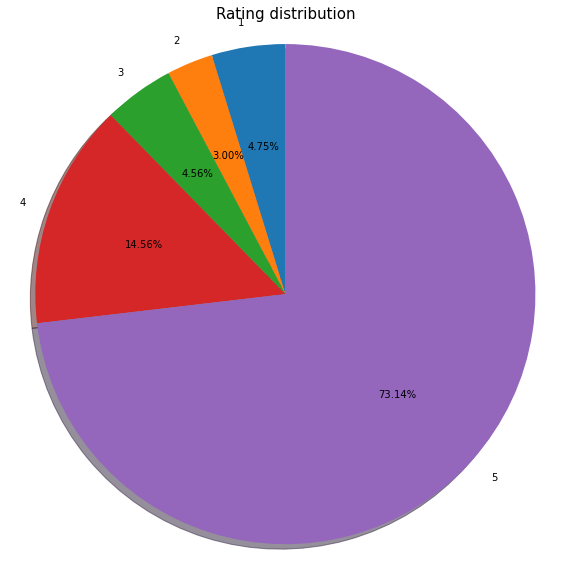

In [23]:
labels = rating.index
values = rating['Total_count']
fig2, ax = plt.subplots(figsize =(10, 10))
ax.pie(values, labels=labels, shadow=True, autopct='%.2f%%', startangle=90)
ax.set_title('Rating distribution' , fontsize=15)
ax.axis('equal')
fig2.show()

## Text Preprocessing

### Converting into lowercase

In [24]:
data.verified_reviews = data.verified_reviews.apply(lambda x: " ".join(x.lower() for x in x.split()))
data.verified_reviews.head()

0                                        love my echo!
1                                            loved it!
2    sometimes while playing a game, you can answer...
3    i have had a lot of fun with this thing. my 4 ...
4                                                music
Name: verified_reviews, dtype: object

We are converting text in all documents into lowercase. This is to reduce the importance to unwanted words.

### Removing Punctuations

In [25]:
data.verified_reviews = data.verified_reviews.str.replace('[^\w\s]','')
data.verified_reviews.head()

0                                         love my echo
1                                             loved it
2    sometimes while playing a game you can answer ...
3    i have had a lot of fun with this thing my 4 y...
4                                                music
Name: verified_reviews, dtype: object

Removing punctuations will help tokenize the words simpler.

### Removing Stop Words

In [26]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data.verified_reviews = data.verified_reviews.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data.verified_reviews.head()

0                                            love echo
1                                                loved
2    sometimes playing game answer question correct...
3    lot fun thing 4 yr old learns dinosaurs contro...
4                                                music
Name: verified_reviews, dtype: object

Stop words are the most common and frequent words in the language like in, is, as, the etc. These words have no importance and these are repeated many times in a document. So we remove these stop words before model creating.

### Removing numbers

In [27]:
data.verified_reviews = data.verified_reviews.apply(lambda x: " ".join(x for x in x.split() if not x.isdigit()))
data.verified_reviews.head()


0                                            love echo
1                                                loved
2    sometimes playing game answer question correct...
3    lot fun thing yr old learns dinosaurs control ...
4                                                music
Name: verified_reviews, dtype: object

Having numbers will effect the performance of vectoriztion as well gets unwanted importance to these numbers. We use short hand for loop to remove the numbers.

In [28]:
data['verified_reviews'] = data['verified_reviews'].str.replace('\d+', '')

There are some reviews with the combination of both string and number. To remove those we have used the above code

### Lemmatization

In [29]:
import nltk
#nltk.download()

In [30]:

from nltk.stem import WordNetLemmatizer
LT = WordNetLemmatizer()
for index, row in data.iterrows():
    filter_line = ' '
    line = row['verified_reviews']
    words = nltk.word_tokenize(line) #tokenization
    for word in words:
        filter_line = filter_line + ' ' + str(LT.lemmatize(word))
    data.loc[index,'verified_reviews'] = filter_line

Lemmatization is the process to cut down the words to its core root. It is a calculating way of cutting down words to their standard dictionory form. We are also performing tokenization, it is the process to split the given text into smaller pieces called tokens. We used nested for loop to perform both tokeniztion and lemmatization.

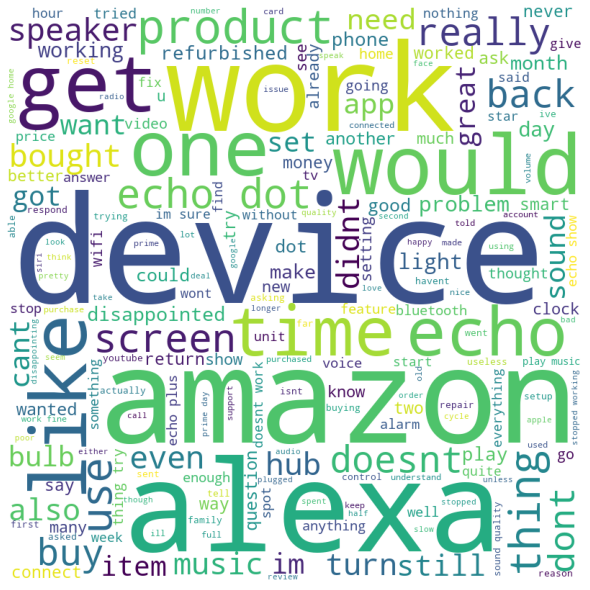

In [31]:
from wordcloud import WordCloud
words = ''
for values in data[data['feedback'] == 0].verified_reviews:
    values = str(values)
    split_values = values.split()
    words += " ".join(split_values)+ " "
    
WC = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop, 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

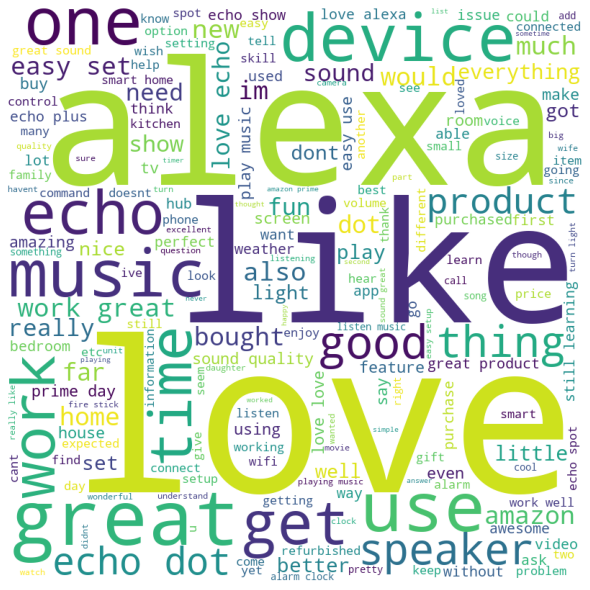

In [32]:
words = ''
for values in data[data['feedback'] == 1].verified_reviews:
    values = str(values)
    split_values = values.split()
    words += " ".join(split_values)+ " "
    
WC = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop, 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Using for loop and matplotlib we have plotted word cloud for negative and positive review. This word cloud shows the most frequent words in terms of its size. Most frequent word used in both negative and positive review is 'alexa'

### top 10 words frequency

In [33]:
freq = pd.Series(' '.join(data.verified_reviews).split()).value_counts()[:15]
freq

love       998
echo       856
great      717
alexa      613
work       532
music      525
like       505
use        465
sound      416
one        365
device     345
dot        343
easy       337
speaker    303
set        299
dtype: int64

In [34]:
stop = ['amazon', 'echo', 'device', 'dot', 'alexa']
data.verified_reviews = data.verified_reviews.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

We have seen how the words echo, alexa, device, dot, amazon are occuring more frequently. These words are not that important for the model. If we keep these words the model would give importance to these words, so we remove those words using for loop.

### frequency of rare words

In [35]:
freq2 = pd.Series(' '.join(data.verified_reviews).split()).value_counts()[-10:]
freq2

butomg            1
gain              1
tony              1
moana             1
iove              1
divertido         1
birth             1
belong            1
packageperhaps    1
garbageeven       1
dtype: int64

In [36]:
data.verified_reviews = data.verified_reviews.apply(lambda x: " ".join(x for x in x.split() if x not in freq2))
data.verified_reviews.head()

0                                                 love
1                                                loved
2    sometimes playing game answer question correct...
3    lot fun thing yr old learns dinosaur control l...
4                                                music
Name: verified_reviews, dtype: object

We have checked the top 10 rare words in the review column and removed them using for loop. Since they dont affect the model that much

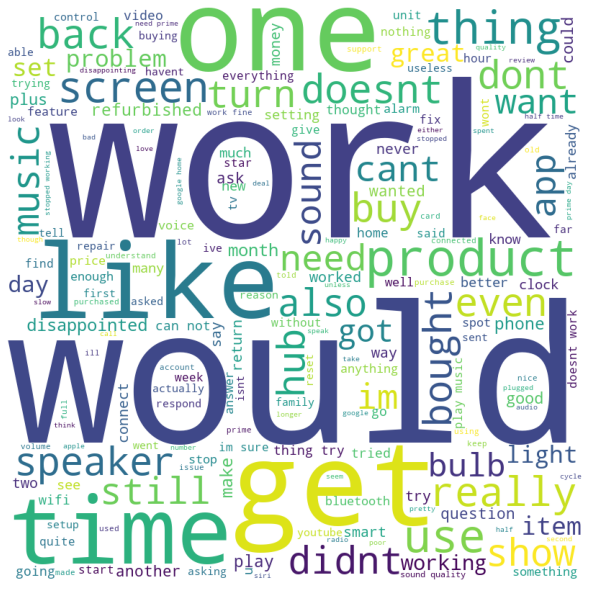

In [37]:
words = ''
for values in data[data['feedback'] == 0].verified_reviews:
    values = str(values)
    split_values = values.split()
    words += " ".join(split_values)+ " "
    
WC = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop, 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

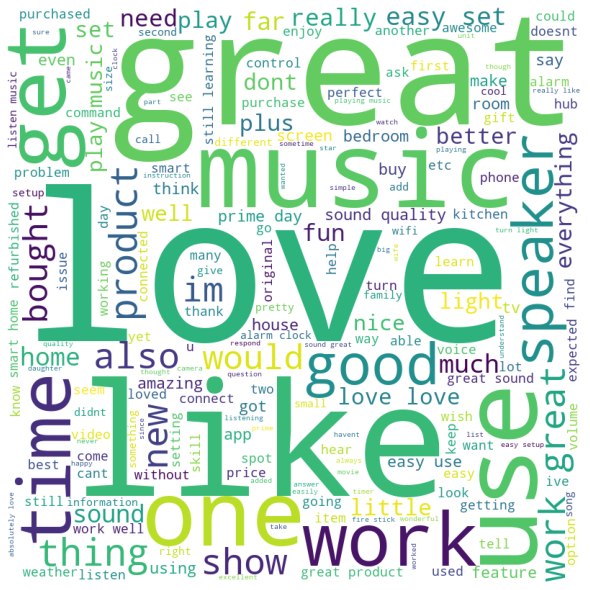

In [38]:
words = ''
for values in data[data['feedback'] == 1].verified_reviews:
    values = str(values)
    split_values = values.split()
    words += " ".join(split_values)+ " "
    
WC = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop, 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(WC) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

After removing the top frequent words which are irrrelavant, we have got the word clouds as displayed above.

The above code gives us the word clouds for each variation of the Alexa

In [39]:
data_grouped=data[['variation','verified_reviews']].groupby(by='variation').agg(lambda x:' '.join(x))
data_grouped.head()

verified_reviews
variation                                                     
Black        item longer work month use connect wifi unresp...
Black  Dot   set play home theater system fat using weather...
Black  Plus  use primarily listening music checking weather...
Black  Show  love love love love feel like talking computer...
Black  Spot  used product phone look weather watch video am...

In [40]:
from sklearn.feature_extraction.text import CountVectorizer 
count=CountVectorizer(analyzer='word')
df=count.fit_transform(data_grouped['verified_reviews'])
df1 = pd.DataFrame(df.toarray(), columns=count.get_feature_names())
df1.index=data_grouped.index
df1.head(3)

_specifically_  abay  abc  abd  ability  able  abode  absolutely  \
variation                                                                       
Black                     0     0    0    0        1     1      0           4   
Black  Dot                0     0    0    0        2    10      0           8   
Black  Plus               0     0    0    0        5    10      0           1   

             absolutly  ac  ...  youve  yr  yup  zero  zigbee  zonkedout  \
variation                   ...                                            
Black                1   0  ...      0   0    0     0       0          0   
Black  Dot           0   0  ...      2   0    0     0       0          0   
Black  Plus          0   0  ...      0   0    0     1       2          0   

             zwave  zzzz  zzzzzzz  útil  
variation                                
Black            0     0        0     0  
Black  Dot       0     0        0     0  
Black  Plus      3     1        0     0  

[3 rows x 3834 columns]

Using groupby function, first we have grouped the reviews with device type and stored into different variable. Then using countvectorizer we have split the sentences into columns by words. Then converting them into numerical feature in terms of its occurence. The above code is performed to get the device wise wrod cloud.

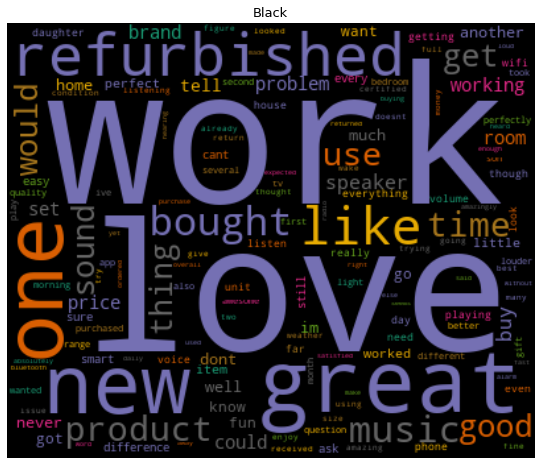

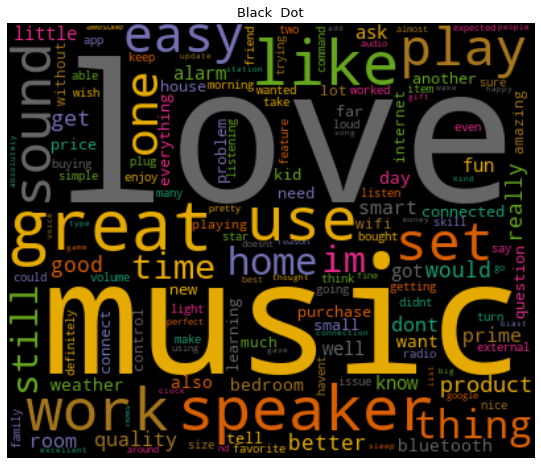

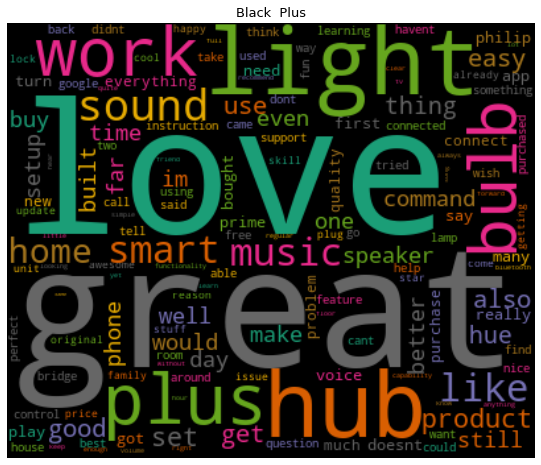

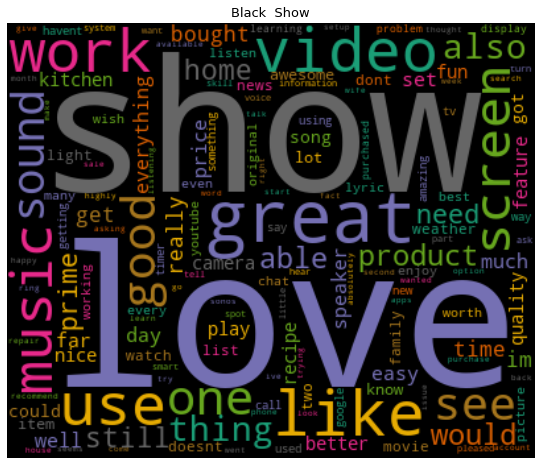

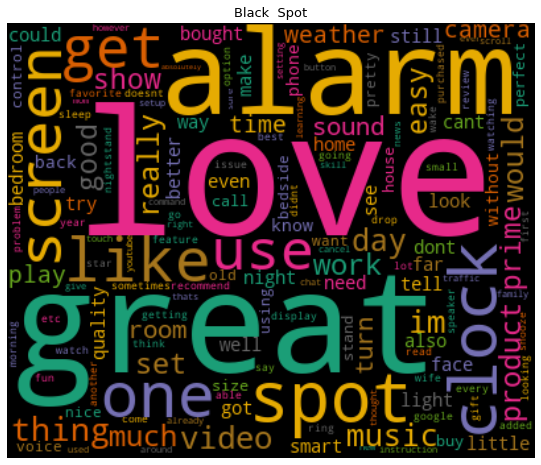

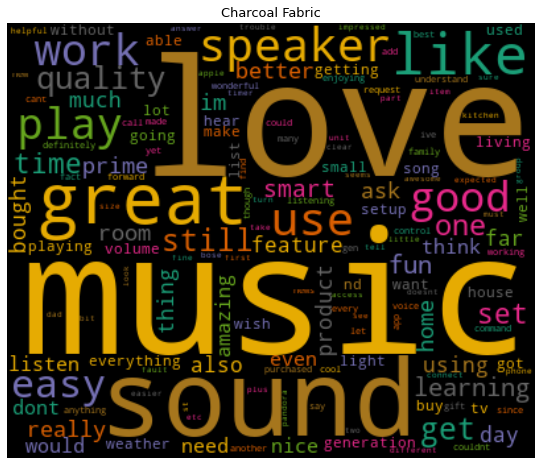

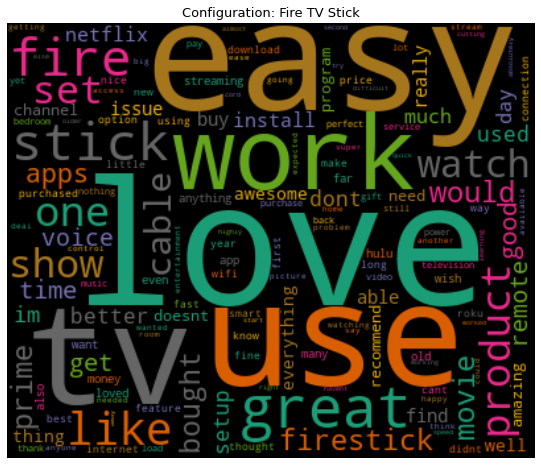

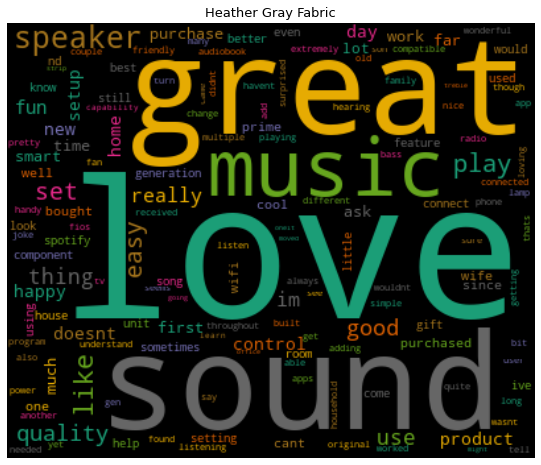

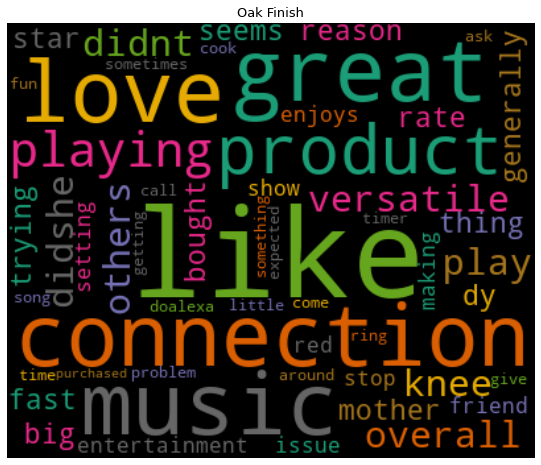

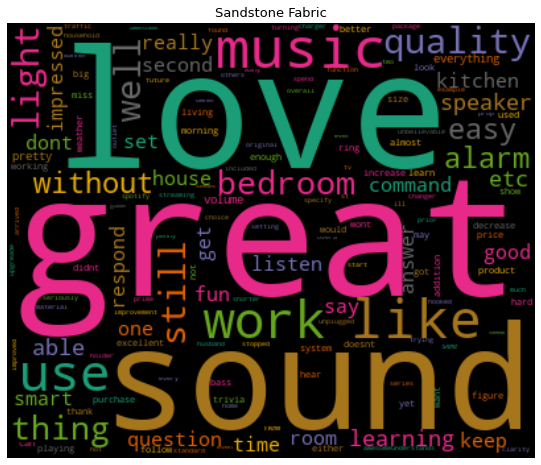

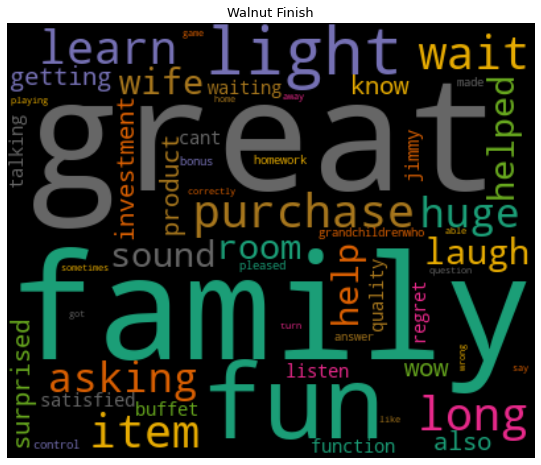

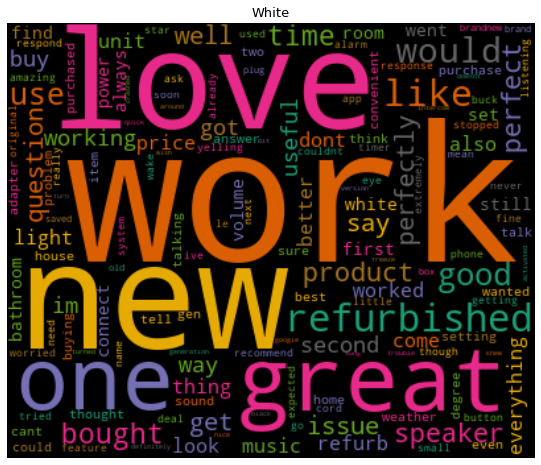

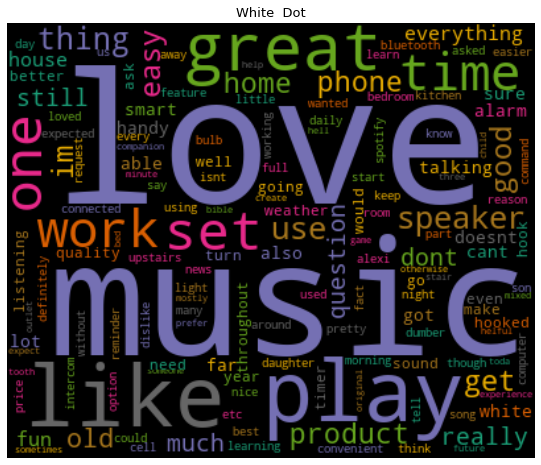

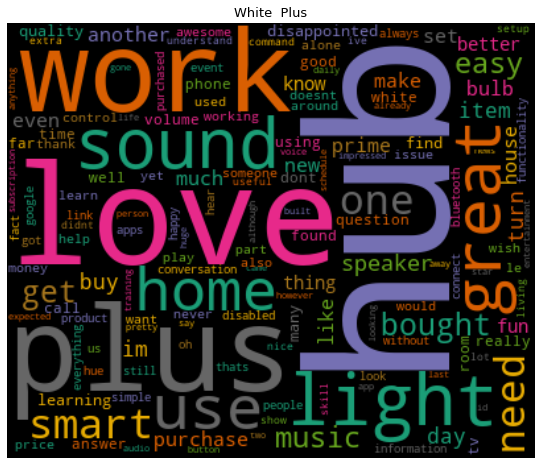

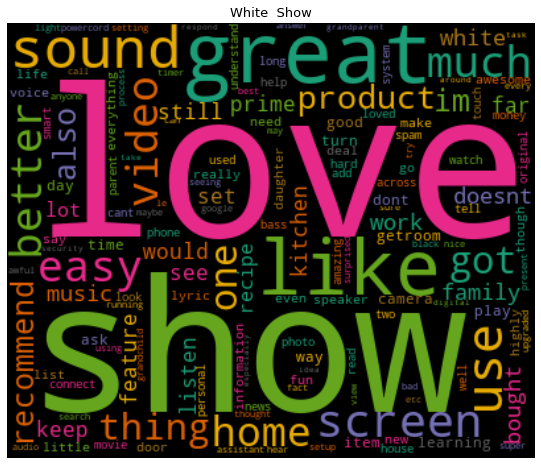

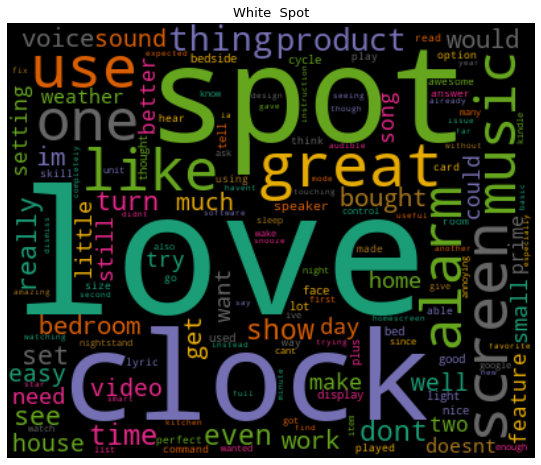

In [41]:
# Function for generating word clouds
from textwrap import wrap
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df1=df1.transpose()

# Plotting word cloud for each product
for index,variation in enumerate(df1.columns):
  generate_wordcloud(df1[variation].sort_values(ascending=False),variation)

Earlier we have seen alexa, device, dot, amazon, echo as most frequent words. Now after dropping those words, we can see the relavent words that need to be there in review.

In [42]:
from textblob import TextBlob
data['polarity']=data['verified_reviews'].apply(lambda x:TextBlob(x).sentiment.polarity)

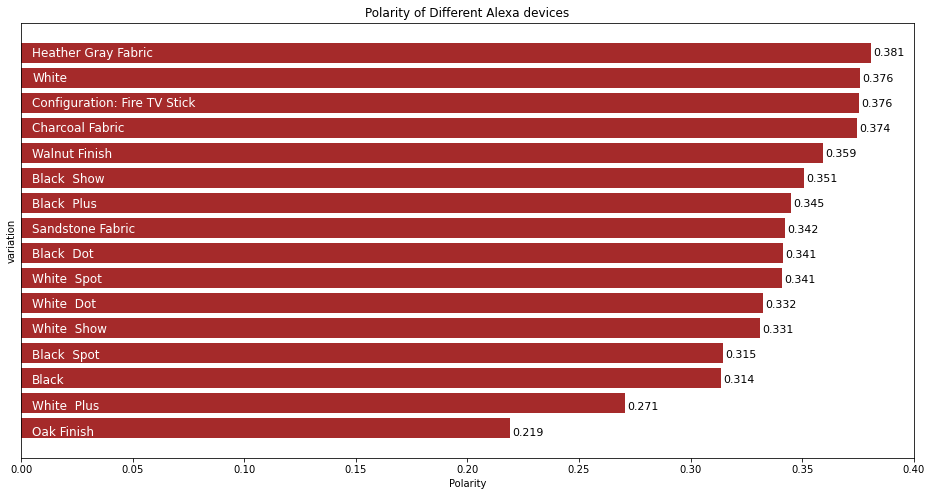

In [43]:
variation_polarity=pd.DataFrame(data.groupby('variation')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('variation')
plt.title('Polarity of Different Alexa devices')
polarity_graph=plt.barh(np.arange(len(variation_polarity.index)),variation_polarity['polarity'],color='Brown',)

# Writing device names on bar
for bar,variation in zip(polarity_graph,variation_polarity.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(variation),va='center',fontsize=12,color='WHITE')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,variation_polarity['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

Polarity is a function in text blob library.
A sentiment in the text is defined by the intensity of each word in the sentence.
This method assigns the value to all words and then takes the average of them.
Polarity lies between -1,1. -1 means there is negative sentiment and 1 is positive sentiment.

### Feature Engineering

In [44]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
data.variation = encoder.fit_transform(data.variation, data['feedback'])

C:\Users\saisa\Anaconda3\envs\DAB-300\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


We have a column called variation, which means types of 'alexa' device. It is a nominal variable, so we have used target encoder convert the values in the variable into numerical. We have used target encoding from the library category encoders. Target encoding first groups each types of device in the variation and gets the number of occurrences. Using this occurrences, it calculates the probability of each type of device for the target and assign that value to that type.

In [45]:
data.head()

rating       date  variation  \
0       5  31-Jul-18   0.972093   
1       5  31-Jul-18   0.972093   
2       4  31-Jul-18   0.999974   
3       5  31-Jul-18   0.972093   
4       5  31-Jul-18   0.972093   

                                    verified_reviews  feedback  polarity  
0                                               love         1  0.500000  
1                                              loved         1  0.700000  
2  sometimes playing game answer question correct...         1  0.000000  
3  lot fun thing yr old learns dinosaur control l...         1  0.233333  
4                                              music         1  0.000000

## Model building

### Model building with only text column

In [46]:
y = data.feedback.values
x = data.verified_reviews

### Vectorizing the words using Tfidf

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(x)
freq_term_matrix = count_vectorizer.transform(x)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
X =tfidf.fit_transform(freq_term_matrix)


Scikit-learn’s Count Vectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

Term frequency is number of times a word appears in the document divided by total number of words in the document. Every document has its own term frequency.

Inverse Data Frequency is log of number of documents divided by number of documents that contains that word.

### Splitting the data into train and test

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=590)

In [50]:
X_train.shape

(2763, 3834)

### Oversampling the minority class

In [51]:
unique, count = np.unique(y_train, return_counts=True)
labels_dict_value_count = { k:v for (k,v) in zip(unique, count)}
labels_dict_value_count

{0: 215, 1: 2548}

In [52]:
from imblearn.over_sampling import SMOTENC

sm = SMOTENC(categorical_features=True, random_state=12)
X_train, y_train = sm.fit_sample(X_train, y_train)

unique, count = np.unique(y_train, return_counts=True)
labels_dict_value_count = { k:v for (k,v) in zip(unique, count)}
labels_dict_value_count

{0: 2548, 1: 2548}

### Naive Bayes

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
NB = MultinomialNB()
NB_cross_val_score = cross_val_score(NB,X,y,cv=10).mean()
print("Cross val score is", NB_cross_val_score)
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)

Cross val score is 0.9208722873217987


In [54]:
from sklearn.metrics import accuracy_score
acc_NB = accuracy_score(y_test,y_pred)
acc_NB

0.922077922077922

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 20,   3],
       [ 21, 264]], dtype=int64)

<AxesSubplot:>

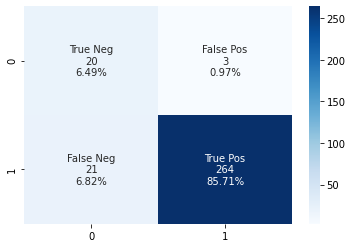

In [56]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [57]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.49      0.87      0.62        23
           1       0.99      0.93      0.96       285

    accuracy                           0.92       308
   macro avg       0.74      0.90      0.79       308
weighted avg       0.95      0.92      0.93       308



### Support Vector Machine

In [58]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear', C=1, random_state=590)
SVM_cross_val_score = cross_val_score(clf,X,y,cv=10).mean()
print("Cross val score ", SVM_cross_val_score)
clf.fit(X_train,y_train)
y_pred_svm = clf.predict(X_test)

Cross val score  0.9345446084859764


In [59]:
acc_svm = accuracy_score(y_test,y_pred_svm)
print("Accuracy is", acc_svm)

Accuracy is 0.9512987012987013


In [60]:
report1 = classification_report(y_test, y_pred_svm)
print(report1)

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        23
           1       0.97      0.98      0.97       285

    accuracy                           0.95       308
   macro avg       0.83      0.81      0.82       308
weighted avg       0.95      0.95      0.95       308



In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
cm

array([[ 15,   8],
       [  7, 278]], dtype=int64)

<AxesSubplot:>

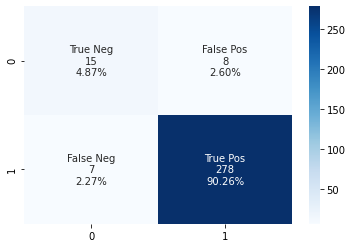

In [62]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

### K Nearest Neighbors

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_cross_val_score = cross_val_score(knn_clf,X,y,cv=10).mean()
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)

In [64]:
acc_knn = accuracy_score(y_test,knn_pred)
acc_knn

0.9285714285714286

In [65]:
report2 = classification_report(y_test, knn_pred)
print(report2)

              precision    recall  f1-score   support

           0       0.54      0.30      0.39        23
           1       0.95      0.98      0.96       285

    accuracy                           0.93       308
   macro avg       0.74      0.64      0.68       308
weighted avg       0.92      0.93      0.92       308



In [66]:
cm = confusion_matrix(y_test, knn_pred)
cm

array([[  7,  16],
       [  6, 279]], dtype=int64)

<AxesSubplot:>

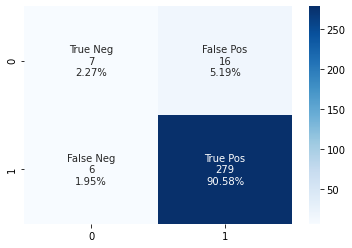

In [67]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

### Random Forest

In [68]:
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(random_state = 0)
knn_cross_val_score = cross_val_score(knn_clf,X,y,cv=10).mean()
rfc_clf.fit(X_train, y_train)
# Predicting the Test set results 
rfc_pred = rfc_clf.predict(X_test)

In [69]:
acc_rf = accuracy_score(y_test,rfc_pred)
acc_rf

0.9448051948051948

In [70]:
report3 = classification_report(y_test, rfc_pred)
print(report3)

              precision    recall  f1-score   support

           0       0.75      0.39      0.51        23
           1       0.95      0.99      0.97       285

    accuracy                           0.94       308
   macro avg       0.85      0.69      0.74       308
weighted avg       0.94      0.94      0.94       308



In [71]:
cm = confusion_matrix(y_test, rfc_pred)
cm

array([[  9,  14],
       [  3, 282]], dtype=int64)

<AxesSubplot:>

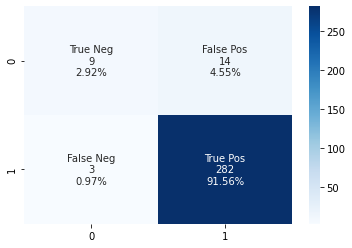

In [72]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

### Model building using both text and categorical variables

In [73]:
from sklearn_pandas import DataFrameMapper
mapper = DataFrameMapper([
     ('verified_reviews', TfidfVectorizer()),
     ('variation', None),
     ('rating', None),
 ])

In [74]:
features = mapper.fit_transform(data)

In [75]:
x_train, x_test, Y_train, Y_test = train_test_split(features,y,test_size=0.1, random_state=590)

In [76]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_Scaled = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Oversampling the minority class

In [77]:
unique, count = np.unique(Y_train, return_counts=True)
labels_dict_value_count = { k:v for (k,v) in zip(unique, count)}
labels_dict_value_count

{0: 215, 1: 2548}

In [78]:
sm = SMOTENC(categorical_features=True, random_state=12)
x_train, Y_train = sm.fit_sample(x_train_Scaled, Y_train)

unique, count = np.unique(Y_train, return_counts=True)
labels_dict_value_count = { k:v for (k,v) in zip(unique, count)}
labels_dict_value_count

{0: 2548, 1: 2548}

### Naive Bayes

In [79]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
NB = MultinomialNB()
NB_cross_val_score = cross_val_score(NB,features,y,cv=10).mean()
print("Cross val score is", NB_cross_val_score)
NB.fit(x_train, Y_train)
Y_pred = NB.predict(x_test)

Cross val score is 0.9238028258386564


In [80]:
ACC_NB = accuracy_score(Y_test,Y_pred)
ACC_NB

0.9675324675324676

In [81]:
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[ 20,   3],
       [  7, 278]], dtype=int64)

<AxesSubplot:>

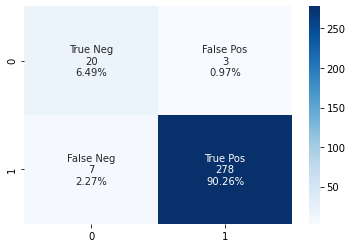

In [82]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [83]:
report4 = classification_report(Y_test,Y_pred)
print(report4)

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        23
           1       0.99      0.98      0.98       285

    accuracy                           0.97       308
   macro avg       0.87      0.92      0.89       308
weighted avg       0.97      0.97      0.97       308



### Support Vector Machine

In [84]:
clf = svm.SVC(kernel = 'linear', C=1)
SVM_cross_val_score = cross_val_score(clf,features,y,cv=10).mean()
print("Cross val score ", SVM_cross_val_score)
clf.fit(x_train,Y_train)
Y_pred_svm = clf.predict(x_test)

Cross val score  1.0


In [85]:
ACC_svm = accuracy_score(Y_test,Y_pred_svm)
print("Accuracy is", ACC_svm)

Accuracy is 0.9967532467532467


In [86]:
report1 = classification_report(Y_test,Y_pred_svm)
print(report1)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      1.00      1.00       285

    accuracy                           1.00       308
   macro avg       0.98      1.00      0.99       308
weighted avg       1.00      1.00      1.00       308



In [87]:
cm = confusion_matrix(Y_test,Y_pred_svm)
cm

array([[ 23,   0],
       [  1, 284]], dtype=int64)

<AxesSubplot:>

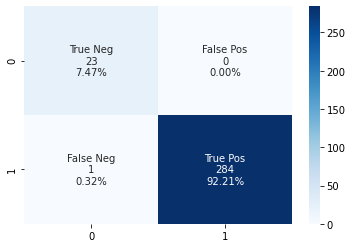

In [88]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

### K Nearest Neighbors

In [89]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_cross_val_score = cross_val_score(knn_clf,features,y,cv=10).mean()
knn_clf.fit(x_train, Y_train)
KNN_pred = knn_clf.predict(x_test)

In [90]:
ACC_knn = accuracy_score(Y_test,KNN_pred)
print(ACC_knn)

0.9935064935064936


In [91]:
report5 = classification_report(Y_test,KNN_pred)
print(report5)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.99      1.00       285

    accuracy                           0.99       308
   macro avg       0.96      1.00      0.98       308
weighted avg       0.99      0.99      0.99       308



In [92]:
cm = confusion_matrix(Y_test,KNN_pred)
cm

array([[ 23,   0],
       [  2, 283]], dtype=int64)

<AxesSubplot:>

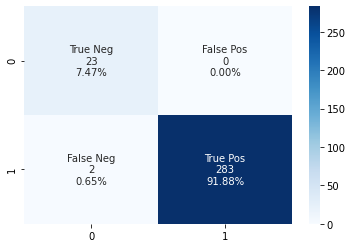

In [93]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

### Random Forest

In [94]:
rfc_clf = RandomForestClassifier(random_state = 0)
knn_cross_val_score = cross_val_score(knn_clf,features,y,cv=10).mean()
rfc_clf.fit(x_train, Y_train)
# Predicting the Test set results 
RFC_pred = rfc_clf.predict(x_test)

In [95]:
ACC_rf = accuracy_score(Y_test,RFC_pred)
ACC_rf

0.9902597402597403

In [96]:
report6 = classification_report(Y_test,RFC_pred)
print(report6)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.99      1.00      0.99       285

    accuracy                           0.99       308
   macro avg       0.97      0.95      0.96       308
weighted avg       0.99      0.99      0.99       308



In [97]:
cm = confusion_matrix(Y_test,RFC_pred)
cm

array([[ 21,   2],
       [  1, 284]], dtype=int64)

<AxesSubplot:>

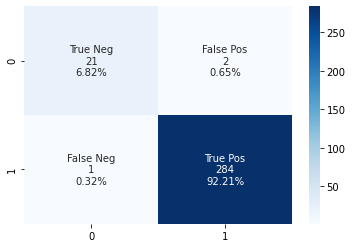

In [98]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

### Comparing the accuracies

In [99]:
acc = {'Model Name':['Naive Bayes classifier','KNN classifier','SVM classifier','Random Forest Classifier'],
        'Accuracies without categorical':[acc_NB,acc_knn,acc_svm,acc_rf],
      'Accuracies with categorical':[ACC_NB,ACC_knn,ACC_svm,ACC_rf]}

In [100]:
Accuracies = pd.DataFrame(acc, columns = ['Model Name','Accuracies without categorical','Accuracies with categorical'])
Accuracies

Model Name  Accuracies without categorical  \
0    Naive Bayes classifier                        0.922078   
1            KNN classifier                        0.928571   
2            SVM classifier                        0.951299   
3  Random Forest Classifier                        0.944805   

   Accuracies with categorical  
0                     0.967532  
1                     0.993506  
2                     0.996753  
3                     0.990260

In conclusion, we can see that performance of the model improves after using all the columns in the dataset. But there is also overfitting happening because of less data to train. If we have more data to train, then the model would have done much better.

After reviewing the polarity chart devices oak finish and white plus have less polarity.
Amazon should focus on these both devices and tailor them accordingly.